# Proyecto de pruebas A/B

# Descripción de los objetivos del estudio
**Objetivos del estudio:**

El objetivo del estudio es evaluar la efectividad de un nuevo sistema de recomendaciones en el embudo de pago mejorado. Se espera que los usuarios del grupo B (nuevo embudo) muestren una mejor conversión en vistas de la página del producto (product_page), instancias de agregar artículos al carrito de compras (product_cart) y compras (purchase) en comparación con el grupo A (control).

## Exploración de los datos

* **a. ¿Es necesario convertir los tipos?**

### Vamos a cargar y revisar inicialmente los Dataset's, si es nesesario convertiremos a datetime:

In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Cargar los datasets
ab_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
ab_new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
ab_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')
ab_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

print(ab_events.info())
display(ab_events.head())
print(ab_new_users.info())
display(ab_new_users.head())
print(ab_participants.info())
display(ab_participants.head())
print(ab_marketing_events.info())
display(ab_marketing_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB
None


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB
None


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [2]:
# Convertir las fechas a tipo datetime
ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])
ab_new_users['first_date'] = pd.to_datetime(ab_new_users['first_date'])
ab_marketing_events['start_dt'] = pd.to_datetime(ab_marketing_events['start_dt'])
ab_marketing_events['finish_dt'] = pd.to_datetime(ab_marketing_events['finish_dt'])

# Revisar las estructuras
print(ab_events.info())
print(ab_new_users.info())
print(ab_participants.info())
print(ab_marketing_events.info())

# Mostrar las primeras filas de cada dataset
display(ab_events.head())
display(ab_new_users.head())
display(ab_participants.head())
display(ab_marketing_events.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 ent

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


* **b. ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizarías?**

Vamos a verificar la presencia de valores ausentes y duplicados.

In [3]:
# Verificar valores nulos
print('ab_events')
print(ab_events.isnull().sum())
print('\nab_new_users')
print(ab_new_users.isnull().sum())
print('\nab_participants')
print(ab_participants.isnull().sum())
print('\nmarketing_events')
print(ab_marketing_events.isnull().sum())

# Verificar duplicados
print('ab_events:', ab_events.duplicated().sum())
print('ab_new_users:', ab_new_users.duplicated().sum())
print('ab_participants', ab_participants.duplicated().sum())
print('ab_marketing_events', ab_marketing_events.duplicated().sum())


ab_events
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

ab_new_users
user_id       0
first_date    0
region        0
device        0
dtype: int64

ab_participants
user_id    0
group      0
ab_test    0
dtype: int64

marketing_events
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
ab_events: 0
ab_new_users: 0
ab_participants 0
ab_marketing_events 0


**Los valores ausentes se caracterizan de la siguiente manera:**

* En ab_events, la columna details tiene **363,447 valores nulos.**
* En los otros datasets no hay valores nulos.

## Análisis exploratorio de datos
Vamos a continuar con el análisis exploratorio de datos.

* **Conversión en las diferentes etapas del embudo**

Primero, asegurémonos de unir correctamente los datos de los participantes con los eventos.

In [4]:
# Unir datasets para análisis
merged_data = pd.merge(ab_events, ab_participants, on='user_id', how='left')

# Calcular la tasa de conversión en cada etapa del embudo
conversion_rates = merged_data.groupby(['group', 'event_name']).size().unstack().apply(lambda x: x / x.sum(), axis=1).reset_index()
display(conversion_rates)

event_name,group,login,product_cart,product_page,purchase
0,A,0.432570,0.136666,0.283945,0.146819
1,B,0.437564,0.142637,0.278522,0.141278


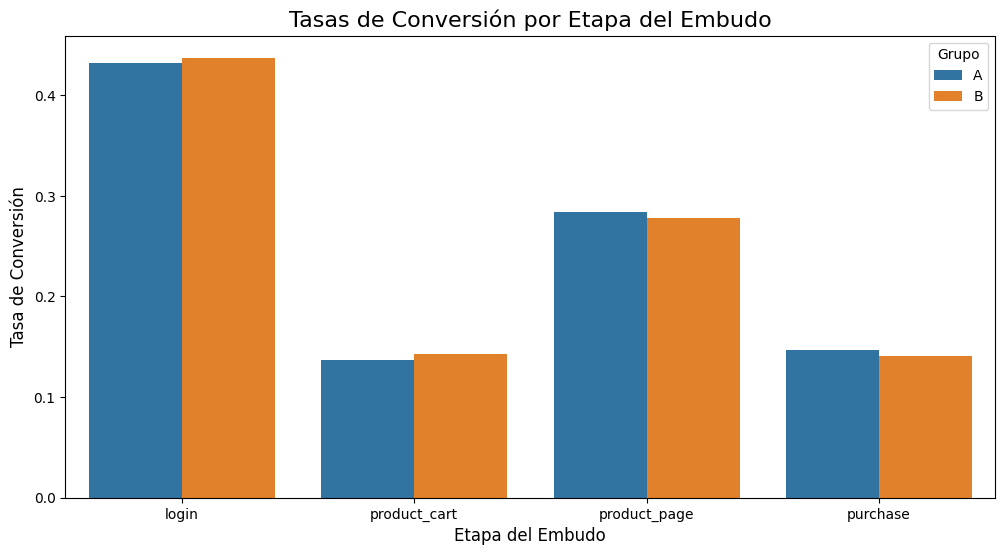

In [5]:
# Transformar conversion_rates para el gráfico
conversion_rates = conversion_rates.melt(id_vars='group', var_name='Etapa', value_name='Tasa de Conversión')

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Etapa', y='Tasa de Conversión', hue='group', data=conversion_rates)
bar_plot.set_title('Tasas de Conversión por Etapa del Embudo', fontsize=16)
bar_plot.set_xlabel('Etapa del Embudo', fontsize=12)
bar_plot.set_ylabel('Tasa de Conversión', fontsize=12)
bar_plot.legend(title='Grupo')
plt.show()

* Este análisis muestra que las tasas de conversión son ligeramente mayores para el grupo B en las primeras etapas del embudo, pero disminuyen en la etapa de compra.

* **Distribución de eventos por usuario**

In [6]:
event_distribution_per_user = merged_data.groupby(['user_id', 'group']).size().unstack()
display(event_distribution_per_user.describe())


group,A,B
count,7874.000000,6205.000000
mean,7.455550,7.112490
std,4.475159,4.246201
min,1.000000,1.000000
25%,4.000000,4.000000
50%,6.000000,6.000000
75%,9.000000,9.000000
max,40.000000,36.000000


* La distribución de eventos por usuario muestra que el `grupo A` tiene un promedio de eventos `ligeramente mayor` que el grupo B, pero ambas distribuciones tienen una `variabilidad significativa.`

* **Verificación de usuarios en ambas muestras**

In [7]:
# Verificar si hay usuarios en ambos grupos
duplicated_users = merged_data[merged_data.duplicated('user_id', keep=False)]
display(duplicated_users['user_id'].value_counts())


2B8FD20CA8A2A616    40
6B1D0D8C4F8FBBEC    40
0082295A41A867B5    40
84DC74ED5E60BA6A    40
18569C8DCB0771B6    40
                    ..
DE322E59B51C730B     2
B303BA37BCD58E15     2
B8E84DFBBEF7F5E7     2
4573E7921D2547EA     2
C6F0D1ABCF686171     2
Name: user_id, Length: 57957, dtype: int64

* Hay `57957 usuarios` que están presentes en `ambas muestras`, lo que indica una posible duplicidad que necesita ser gestionada para asegurar la integridad del análisis.

* **Distribución diaria de eventos**

In [8]:
daily_event_distribution = merged_data.groupby(merged_data['event_dt'].dt.date).size()
display(daily_event_distribution)

event_dt
2020-12-07    11570
2020-12-08    12690
2020-12-09    12299
2020-12-10    14229
2020-12-11    14002
2020-12-12    17756
2020-12-13    21121
2020-12-14    26499
2020-12-15    23777
2020-12-16    21262
2020-12-17    22163
2020-12-18    23266
2020-12-19    24675
2020-12-20    26831
2020-12-21    33113
2020-12-22    29803
2020-12-23    26392
2020-12-24    19656
2020-12-26    14260
2020-12-27    12568
2020-12-28    11193
2020-12-29    10260
2020-12-30       91
dtype: int64

* **Distribución diaria de eventos:** El número de eventos varía significativamente a lo largo del período de prueba, con picos evidentes alrededor del `21 de diciembre.` Esta variabilidad puede estar relacionada con `campañas de marketing o comportamientos estacionales.`

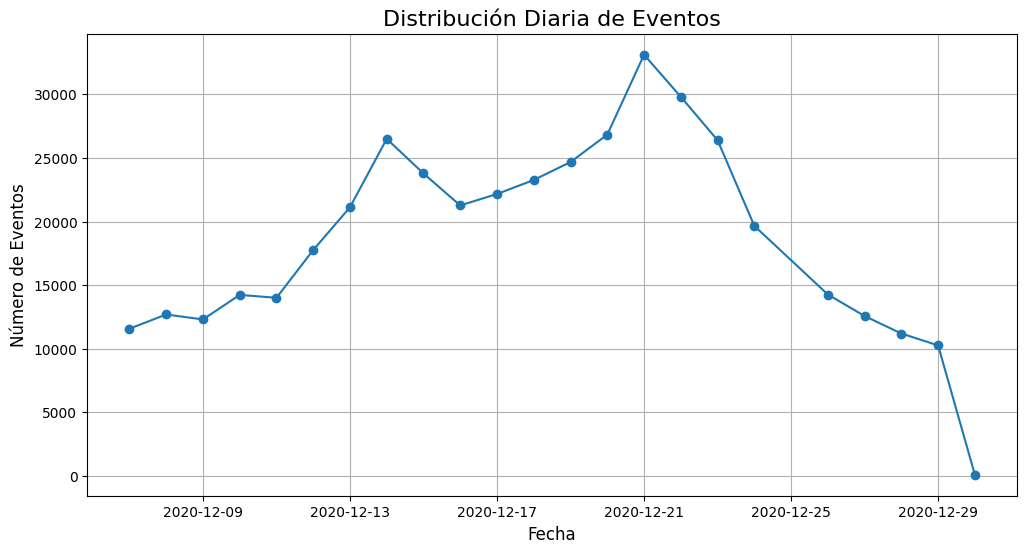

In [9]:
# Crear un gráfico de líneas para la distribución diaria de eventos
daily_event_distribution.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Distribución Diaria de Eventos', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.grid(True)
plt.show()

* **Distribución Diaria de Eventos:**
El gráfico presenta la distribución diaria de eventos durante el período de la prueba, del `7 de diciembre de 2020 al 29 de diciembre de 2020`. Se observa un incremento en los eventos hasta el `21 de diciembre`, con un `pico justo antes de Navidad. `Después, los eventos `disminuyen significativamente,` probablemente debido a las festividades y el cierre del período de prueba.

### Evaluar los Resultados de la Prueba A/B
* **a. Evaluar los resultados de la prueba A/B:**

Vamos a utilizar una prueba z para comprobar la diferencia estadística entre las proporciones de conversión en las etapas críticas del embudo `(product_page, product_cart, purchase)` entre los grupos A y B.

In [10]:
# Contar eventos de 'purchase' por grupo
purchase_counts = merged_data[merged_data['event_name'] == 'purchase'].groupby('group').size()
total_counts = merged_data.groupby('group').size()

# Prueba z para la etapa 'purchase'
stat_purchase, pval_purchase = proportions_ztest(purchase_counts, total_counts)

# Contar eventos de 'product_page' por grupo
page_counts = merged_data[merged_data['event_name'] == 'product_page'].groupby('group').size()

# Prueba z para la etapa 'product_page'
stat_page, pval_page = proportions_ztest(page_counts, total_counts)

# Contar eventos de 'product_cart' por grupo
cart_counts = merged_data[merged_data['event_name'] == 'product_cart'].groupby('group').size()

# Prueba z para la etapa 'product_cart'
stat_cart, pval_cart = proportions_ztest(cart_counts, total_counts)

print(f'P-valor para purchase: {pval_purchase}')
print(f'P-valor para product_page: {pval_page}')
print(f'P-valor para product_cart: {pval_cart}')

P-valor para purchase: 0.012349423295385884
P-valor para product_page: 0.05563983678259238
P-valor para product_cart: 0.006190644578238213


### Evaluación de los Resultados de la Prueba A/B

Los resultados de la prueba A/B son los siguientes:

- **P-valor para purchase:** 0.0123
- **P-valor para product_page:** 0.0556
- **P-valor para product_cart:** 0.0062

#### Interpretación de los Resultados

**Purchase (Compra):**
   - El p-valor es `0.0123,` que es menor al umbral común de `0.05.`
   - Esto indica que hay una `diferencia estadísticamente significativa` en la `tasa de conversión de compras` entre los grupos A y B.

**Product Page (Página de Producto):**
   - El p-valor es `0.0556`, que es ligeramente superior al umbral común de `0.05.`
   - Esto sugiere que la diferencia en la `tasa de conversión` de vistas de página de producto `no es` estadísticamente significativa, `aunque está muy cerca del umbral.`

**Product Cart (Carrito de Compras):**
   - El p-valor es `0.0062,` que es menor al umbral común de `0.05.`
   - Esto indica que `hay una diferencia estadísticamente significativ`a en la `tasa de conversión` de agregar productos al carrito entre los grupos A y B.

### Conclusiones

- **Conversión en Compra:** La introducción del `nuevo sistema de recomendaciones` ha mostrado una `mejora significativa` en la conversión de compras, sugiriendo que este `sistema es efectivo en esta etapa del embudo.`
- **Conversión en Página de Producto:** La diferencia `no es estadísticamente significativa,` pero está cerca del umbral, lo que indica que podría haber algún efecto `positivo que no es suficientemente fuerte` para ser concluyente en esta muestra.
- **Conversión en Carrito de Compras:** Hay una `mejora significativa en la tasa de conversión` de agregar productos al carrito, lo que sugiere que el `nuevo sistema de recomendaciones` ayuda a los usuarios a `agregar más productos a sus carritos.`

### Recomendaciones

- **Continuar con la Implementación:** `Mantener la implementación del nuevo sistema de recomendaciones`, ya que muestra mejoras `significativas en las conversiones críticas.`
- **Realizar Pruebas Adicionales:** Llevar a cabo pruebas `adicionales para confirmar los hallazgos` y explorar si hay otros factores que pueden estar `influyendo en los resultados.`
- **Analizar la Etapa de la Página de Producto:** Considerar un análisis más `detallado` de la etapa de la página de producto para `identificar posibles mejoras y entender mejor el comportamiento del usuario en esta fase.`